In [1]:
!pip install scikit-Learn
!pip install networkX

**format: srcIP protocol dstIP sPort dPort**

14.112.37.26 17 14.112.37.29 138 138

14.112.37.26 17 14.112.37.33 80 80

14.112.37.27 6 14.112.37.34 167 80

14.112.37.28 6 14.112.37.29 443 443

14.112.37.26 17 14.112.37.33 443 80


**Un graphlet avec toutes les srcIP :**
![Image](https://i.imgur.com/63oJq4Q.png)


**Ou bien, un graphlet par srcIP :**

![s10551601232025](https://a.okmd.dev/md/6792120563530.png)
![s13370001222025](https://a.okmd.dev/md/6790e66fe8073.png)
![s13380301222025](https://a.okmd.dev/md/6790e6af42d7b.png)

1001 graphs have been created.
Example Graph: 
Graph for srcIP=732:
Label: normal
Nodes: ['srcIP_732', 'protocol_61', 'dstIP_17', 'sPort_80', 'dPort_53', 'protocol_869', 'dstIP_1', 'sPort_53', 'dPort_22', 'protocol_377', 'sPort_20', 'dPort_25', 'protocol_863', 'sPort_68', 'dPort_80', 'protocol_941', 'sPort_22', 'protocol_72', 'dstIP_6', 'sPort_443', 'protocol_489', 'sPort_79', 'protocol_304', 'sPort_23', 'dPort_23', 'protocol_897', 'protocol_889', 'dstIP_89']
Edges: [('srcIP_732', 'protocol_61'), ('srcIP_732', 'protocol_869'), ('srcIP_732', 'protocol_377'), ('srcIP_732', 'protocol_863'), ('srcIP_732', 'protocol_941'), ('srcIP_732', 'protocol_72'), ('srcIP_732', 'protocol_489'), ('srcIP_732', 'protocol_304'), ('srcIP_732', 'protocol_897'), ('srcIP_732', 'protocol_889'), ('protocol_61', 'dstIP_17'), ('dstIP_17', 'sPort_80'), ('dstIP_17', 'sPort_68'), ('dstIP_17', 'sPort_22'), ('dstIP_17', 'sPort_79'), ('dstIP_17', 'sPort_53'), ('sPort_80', 'dPort_53'), ('protocol_869', 'dstIP_1'), ('dstI

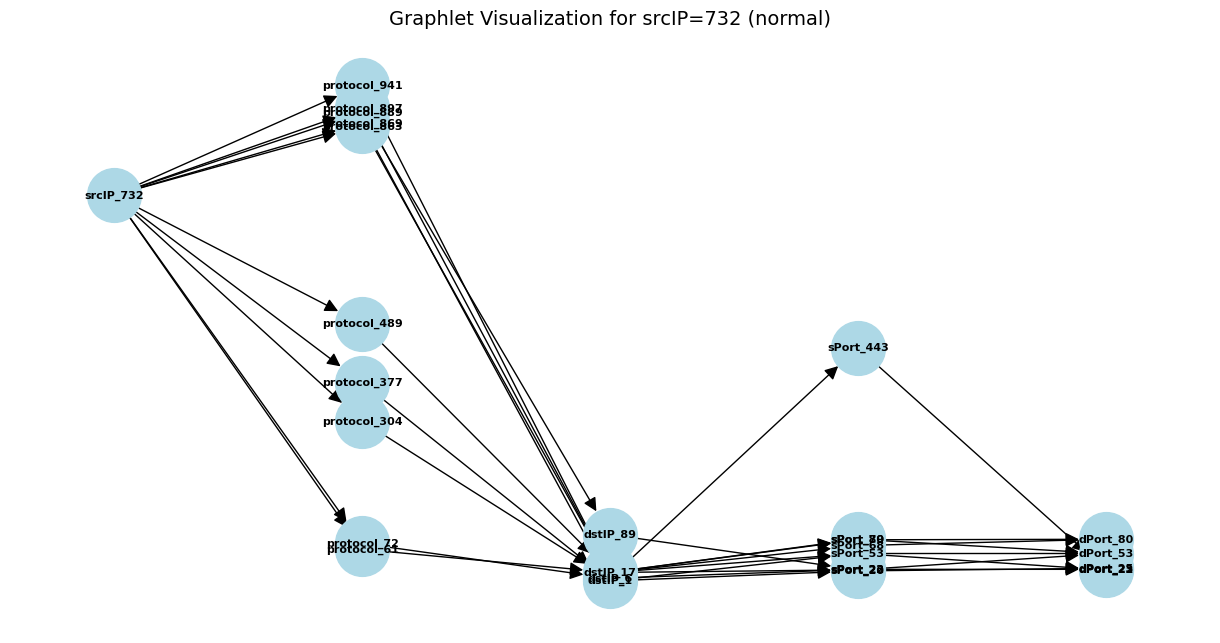

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def read_csv(file_path, has_label):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.
    - has_label (bool): Whether the CSV contains a 'label' column.
    """
    df = pd.read_csv(file_path, header=None)
    if has_label:
        df.columns = ['srcIP', 'protocol', 'dstIP', 'sPort', 'dPort', 'label']
    else:
        df.columns = ['srcIP', 'protocol', 'dstIP', 'sPort', 'dPort']
    return df

def create_graph_for_srcIP(group, has_label):
    """
    Creates a directed graph for a specific srcIP group.

    Parameters:
    - group (DataFrame): Grouped data for a specific srcIP.
    - has_label (bool): Whether the CSV contains a 'label' column.
    """
    G = nx.DiGraph()

    if has_label:
        has_anomaly = any(group['label'] == 'anomaly')
        G.graph['label'] = 'anomaly' if has_anomaly else 'normal'
    else:
        G.graph['label'] = 'unknown'

    for _, row in group.iterrows():
        if has_label:
            srcIP, protocol, dstIP, sPort, dPort, label = row
        else:
            srcIP, protocol, dstIP, sPort, dPort = row
        G.add_edge(f"srcIP_{srcIP}", f"protocol_{protocol}")
        G.add_edge(f"protocol_{protocol}", f"dstIP_{dstIP}")
        G.add_edge(f"dstIP_{dstIP}", f"sPort_{sPort}")
        G.add_edge(f"sPort_{sPort}", f"dPort_{dPort}")

    return G

def visualize_graph(graph, srcIP):
    """
    Visualizes a graph.

    Parameters:
    - graph (DiGraph): Graph to visualize.
    - srcIP (int): The srcIP associated with the graph.
    """
    # Position nodes in a linear layout
    pos = {}
    layers = ['srcIP', 'protocol', 'dstIP', 'sPort', 'dPort']
    layer_index = {layer: i for i, layer in enumerate(layers)}

    for node in graph.nodes():
        layer_type = node.split('_')[0]
        pos[node] = (layer_index[layer_type], int(node.split('_')[1]) if '_' in node else 0)

    # Draw the graph
    plt.figure(figsize=(12, 6))
    nx.draw(graph, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=8, font_weight='bold', arrowsize=20)

    # Add title
    plt.title(f"Graphlet Visualization for srcIP={srcIP} ({graph.graph['label']})", fontsize=14)
    plt.axis('off')
    plt.show()

def main(file_path, srcIP_to_visualize, has_label=True, graphs_by_srcIP=None):
    """
    Main function to process a CSV file and visualize a specific graph.

    Parameters:
    - file_path (str): Path to the CSV file.
    - srcIP_to_visualize (int): The srcIP to visualize.
    - has_label (bool): Indicates if the CSV file has a 'label' column.
    - graphs_by_srcIP (dict): Optional dictionary to store graphs by srcIP. If None, a new dictionary will be created.
    """
    if graphs_by_srcIP is None:
        graphs_by_srcIP = {}

    # Read the CSV file
    data = read_csv(file_path, has_label)
    grouped = data.groupby('srcIP')

    # Create graphs for each srcIP
    for srcIP, group in grouped:
        graph = create_graph_for_srcIP(group, has_label)
        graphs_by_srcIP[srcIP] = graph

    print(f"{len(graphs_by_srcIP)} graphs have been created.")
    print("==========================================")

    # Visualize the graph for the specified srcIP
    if srcIP_to_visualize in graphs_by_srcIP:
        graph = graphs_by_srcIP[srcIP_to_visualize]
        print(f"Example Graph: \nGraph for srcIP={srcIP_to_visualize}:")
        print(f"Label: {graph.graph['label']}")
        print(f"Nodes: {list(graph.nodes())}")
        print(f"Edges: {list(graph.edges())}")

        # Visualize the graph
        visualize_graph(graph, srcIP_to_visualize)
    else:
        print(f"No graph found for srcIP={srcIP_to_visualize}.")

# Example usage
graphs_by_srcIP = {}
main('annotated-trace.csv', 732, has_label=True, graphs_by_srcIP=graphs_by_srcIP)


#TODO √† d√©gager apr√®s test

In [3]:
import networkx as nx

def check_longest_paths(graphs_by_srcIP):
    """Affiche la longueur maximale des chemins dans chaque graphe."""
    for srcIP, graph in graphs_by_srcIP.items():
        longest_path_length = 0

        for node in graph.nodes():
            for target in graph.nodes():
                if node != target:
                    try:
                        path_length = len(nx.shortest_path(graph, node, target)) - 1
                        longest_path_length = max(longest_path_length, path_length)
                    except nx.NetworkXNoPath:
                        pass  # Pas de chemin entre ces deux n≈ìuds

        print(f"üîç Graphe {srcIP} : Longueur max d‚Äôun chemin = {longest_path_length}")

# üî• Ex√©cuter la v√©rification
check_longest_paths(graphs_by_srcIP)


üîç Graphe 1 : Longueur max d‚Äôun chemin = 4
üîç Graphe 2 : Longueur max d‚Äôun chemin = 4
üîç Graphe 3 : Longueur max d‚Äôun chemin = 4
üîç Graphe 4 : Longueur max d‚Äôun chemin = 4
üîç Graphe 5 : Longueur max d‚Äôun chemin = 4
üîç Graphe 6 : Longueur max d‚Äôun chemin = 4
üîç Graphe 7 : Longueur max d‚Äôun chemin = 4
üîç Graphe 8 : Longueur max d‚Äôun chemin = 4
üîç Graphe 9 : Longueur max d‚Äôun chemin = 4
üîç Graphe 10 : Longueur max d‚Äôun chemin = 4
üîç Graphe 11 : Longueur max d‚Äôun chemin = 4
üîç Graphe 12 : Longueur max d‚Äôun chemin = 4
üîç Graphe 13 : Longueur max d‚Äôun chemin = 4
üîç Graphe 14 : Longueur max d‚Äôun chemin = 4
üîç Graphe 15 : Longueur max d‚Äôun chemin = 4
üîç Graphe 16 : Longueur max d‚Äôun chemin = 4
üîç Graphe 17 : Longueur max d‚Äôun chemin = 4
üîç Graphe 18 : Longueur max d‚Äôun chemin = 4
üîç Graphe 19 : Longueur max d‚Äôun chemin = 4
üîç Graphe 20 : Longueur max d‚Äôun chemin = 4
üîç Graphe 21 : Longueur max d‚Äôun chemin = 4


# Fonctions Question 6

In [4]:
def compute_all_walks(graph, walk_length):
    """
    Calcule toutes les marches de longueur exacte `walk_length` en partant des n≈ìuds de type 'protocol_*'.

    Args:
        graph (nx.DiGraph): Le graphlet pour lequel on veut calculer les marches.
        walk_length (int): Longueur des marches.

    Returns:
        list: Une liste de tuples repr√©sentant les chemins de longueur `walk_length`.
    """
    all_walks = []

    def dfs(current_path):
        # Si la marche atteint la longueur souhait√©e, l'ajouter aux r√©sultats
        if len(current_path) == walk_length:
            all_walks.append(tuple(current_path))
            return

        # Continuer √† explorer les voisins du dernier n≈ìud
        last_node = current_path[-1]
        for neighbor in graph.successors(last_node):
            dfs(current_path + [neighbor])

    # D√©marrer l'exploration DFS uniquement depuis les n≈ìuds 'protocol_*'
    for node in graph.nodes():
        if node.startswith("protocol_"):  # Ne commencer que depuis ces n≈ìuds
            dfs([node])

    return all_walks


In [5]:

def create_Unique_Walk_list(graphs_by_srcIP):
    all_walks = []  # Pour collecter tous les chemins uniques

    # Parcourir chaque graphlet pour collecter les marches al√©atoires
    for srcIP, graph in graphs_by_srcIP.items():
        walks = compute_all_walks(graph, walk_length=4)  # Calculer les marches de longueur 4
        all_walks.extend(walks)  # Ajouter les marches de ce graphlet √† la liste globale

    # Identifier les chemins uniques globaux
    unique_walks = list(set(all_walks))  # Chemins uniques
    walk_index = {walk: i for i, walk in enumerate(unique_walks)}  # Map marche -> index


    print(f"Nombre total de marches uniques : {len(unique_walks)}")
    return unique_walks, walk_index


In [6]:
def create_vector_for_graphlet(graphs_by_srcIP, unique_walks, walk_index):
    graphlet_vectors = {}  # Stockage des vecteurs pour chaque graphlet

    for srcIP, graph in graphs_by_srcIP.items():
        vector = np.zeros(len(unique_walks))  # Taille = Nombre total de chemins uniques
        walks = compute_all_walks(graph, walk_length=4)  # R√©cup√©rer les marches de ce graphlet (longueur 4 ici)
        for walk in walks:
            if walk in walk_index:  # V√©rifier si la marche est bien dans l'encodage global
                vector[walk_index[walk]] += 1  # Incr√©menter pour chaque marche
        graphlet_vectors[srcIP] = vector  # Associer le vecteur √† la srcIP
    return graphlet_vectors


In [7]:
def RWK_without_KT(graphs_by_srcIP):
    start = time.time()
    unique_walks, walk_index=create_Unique_Walk_list(graphs_by_srcIP)
    graphlet_vectors=create_vector_for_graphlet(graphs_by_srcIP, unique_walks, walk_index)
    srcIPs = list(graphlet_vectors.keys())  # Toutes les srcIP
    n = len(srcIPs)  # Nombre de graphlets
    dot_product_matrix = np.zeros((n, n))  # Matrice de produit scalaire

    # Calcul du produit scalaire pour chaque paire de graphlets
    for i in range(n):
        for j in range(n):
            vector1 = graphlet_vectors[srcIPs[i]]
            vector2 = graphlet_vectors[srcIPs[j]]
            dot_product_matrix[i, j] = np.dot(vector1, vector2)
    end = time.time()
    time_without_kernelTrick=end-start

    print(f"Temps d'ex√©cution : {time_without_kernelTrick:.2f} secondes")

    print("Matrice de produit scalaire :")
    print(dot_product_matrix)
    return graphlet_vectors, srcIPs



In [8]:
# # D√©finir un seuil pour d√©tecter les similarit√©s √©lev√©es
# similarity_threshold = 1  # Par exemple, des valeurs sup√©rieures √† 100
# similar_pairs = []

# n = len(srcIPs)
# for i in range(n):
#     for j in range(i + 1, n):  # √âviter les doublons et la diagonale
#         value = dot_product_matrix[i, j]
#         if value >= similarity_threshold:
#             similar_pairs.append((srcIPs[i], srcIPs[j], value))

# # Trier les paires par valeur d√©croissante
# similar_pairs = sorted(similar_pairs, key=lambda x: -x[2])

# print("Top 5 des paires de graphlets similaires :")
# for srcIP1, srcIP2, value in similar_pairs[:35]:
#     print(f"{srcIP1} et {srcIP2} avec un produit scalaire de {value}")


In [9]:
# def train_svm(kernel_matrix, labels):
#     """Entra√Æne un mod√®le SVM avec la matrice de noyau et les labels, correctement divis√©s."""
#     n = len(labels)
#     indices = np.arange(n)  # Cr√©e un tableau d'indices (0, 1, ..., n-1)

#     # Diviser les indices en ensembles d'entra√Ænement et de test
#     train_indices, test_indices = train_test_split(indices, test_size=0.3, random_state=42)

#     # Extraire les sous-matrices et sous-labels correspondants
#     X_train = kernel_matrix[np.ix_(train_indices, train_indices)]  # Matrice carr√©e pour l'entra√Ænement
#     X_test = kernel_matrix[np.ix_(test_indices, train_indices)]  # Matrice entre test et train
#     y_train = labels[train_indices]
#     y_test = labels[test_indices]


#     # Entra√Æner le mod√®le SVM
#     clf = SVC(kernel='precomputed')
#     clf.fit(X_train, y_train)

#     # Pr√©dire et √©valuer
#     y_pred = clf.predict(X_test)
#     print(classification_report(y_test, y_pred))

# Fonctions Question 8

In [65]:
from collections import Counter
import time
import networkx as nx  # Assure-toi que NetworkX est bien import√©

def generate_walks(graph, length):
    """G√©n√®re toutes les marches al√©atoires de longueur donn√©e en ignorant le premier n≈ìud (srcIP)."""
    walks = []

    # V√©rification : est-ce que le graphe a des ar√™tes ?
    if len(graph.edges()) == 0:
        print(f"‚ö† Le graphe {graph} est vide, aucune marche possible.")
        return walks  # Retourne une liste vide

    for node in graph.nodes():
        if node.startswith("srcIP_"):  # On ignore les srcIP
            continue
        stack = [(node, [node])]
        while stack:
            current_node, path = stack.pop()
            if len(path) == length + 1:
                walks.append(tuple(path))
            elif len(path) < length + 1:
                for neighbor in graph.successors(current_node):
                    stack.append((neighbor, path + [neighbor]))

    # Affichage si aucun chemin trouv√©
    if not walks:
        print(f"‚ö† Aucun chemin trouv√© pour un graphe avec {len(graph.nodes())} n≈ìuds et {len(graph.edges())} ar√™tes.")

    return walks


def random_walk_kernel(graph1, graph2, walk_length):
    """Calcule le Random Walk Kernel entre deux graphes."""
    print(f"\nüîé Comparaison de deux graphes (RWK) : Longueur demand√©e des marches = {walk_length}")

    # V√©rifier que la longueur demand√©e est coh√©rente
    if walk_length < 1:
        print("‚ö† Longueur de marche trop courte !")
        return 0

    # V√©rification des n≈ìuds et ar√™tes avant g√©n√©ration des marches
    print(f"üìä Graphe 1: {len(graph1.nodes())} n≈ìuds, {len(graph1.edges())} ar√™tes")
    print(f"üìä Graphe 2: {len(graph2.nodes())} n≈ìuds, {len(graph2.edges())} ar√™tes")

    # G√©n√®re les marches al√©atoires pour chaque graphe
    walks1 = compute_all_walks(graph1, walk_length)
    walks2 = compute_all_walks(graph2, walk_length)


    # V√©rification si des marches sont g√©n√©r√©es
    if not walks1 or not walks2:
        print("‚ö† Aucune marche g√©n√©r√©e pour au moins un des graphes.")
        return 0

    # Compte la fr√©quence des marches dans chaque graphe
    freq1 = Counter(walks1)
    freq2 = Counter(walks2)

    # Affichage d'une comparaison entre deux graphes (une seule fois)
    print("\nüîé Exemple de marches g√©n√©r√©es :")
    print(f"Marche 1 ({len(walks1)} marches) : {walks1[:5]} ...")  # Affiche les 5 premi√®res
    print(f"Marche 2 ({len(walks2)} marches) : {walks2[:5]} ...")

    print(f"üìä Fr√©quences des marches (Graphe 1) : {dict(list(freq1.items())[:5])}")
    print(f"üìä Fr√©quences des marches (Graphe 2) : {dict(list(freq2.items())[:5])}")

    # Calcule le produit scalaire entre les fr√©quences des marches communes
    common_walks = set(freq1.keys()) & set(freq2.keys())
    similarity = sum(freq1[walk] * freq2[walk] for walk in common_walks)

    print(f"‚ö° Similarit√© RWK calcul√©e : {similarity}")

    return similarity


def get_longest_path_length(G):
    """Renvoie la longueur du plus long chemin possible en √©vitant l'erreur NetworkXNoPath."""
    longest_path_length = 0

    for source in G.nodes():
        for target in G.nodes():
            if source != target and nx.has_path(G, source, target):  # V√©rifie d'abord si un chemin existe
                try:
                    path_length = len(nx.shortest_path(G, source=source, target=target)) - 1
                    longest_path_length = max(longest_path_length, path_length)
                except nx.NetworkXNoPath:
                    pass  # Ignore si aucun chemin n'existe

    return longest_path_length



def RWK_with_KT(walk_length, graphs_by_srcIP):
    """Calcule RWK entre chaque paire de graphes en limitant √† 10 graphes."""
    start = time.time()
    results = {}
    srcIPs = list(graphs_by_srcIP.keys())

    print("\nüìã Liste des srcIP s√©lectionn√©s :", srcIPs)
    print(f"üîç Longueur demand√©e pour les marches al√©atoires : {walk_length}")

    for i, srcIP_1 in enumerate(srcIPs):
        for j, srcIP_2 in enumerate(srcIPs):
            if i < j:
                G_1 = graphs_by_srcIP[srcIP_1]
                G_2 = graphs_by_srcIP[srcIP_2]

                print(f"üõ† Comparaison {i+1}/{len(srcIPs)} : srcIP {srcIP_1} vs srcIP {srcIP_2}")

                # Calcul du RWK
                rwk = random_walk_kernel(G_1, G_2, walk_length)

                # Stocke le r√©sultat
                results[(srcIP_1, srcIP_2)] = rwk

                # Affichage progressif pour suivi
                print(f"‚úÖ RWK entre {srcIP_1} et {srcIP_2} : {rwk}")

    end = time.time()
    print(f"\n‚è≥ Temps d'ex√©cution : {end - start:.2f} secondes")

    # Enregistrement des r√©sultats
    with open("rwk_results.csv", "w") as file:
        file.write("srcIP_1,srcIP_2,rwk\n")
        for (srcIP_1, srcIP_2), rwk in results.items():
            file.write(f"{srcIP_1},{srcIP_2},{rwk}\n")

    print("üìÇ RWK comparisons completed and results saved to rwk_results.csv.")



In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# √âtape 1 : Charger ou construire la matrice de noyau
def load_kernel_matrix(file_path):
    """Charge la matrice de noyau pr√©-calcul√©e et les √©tiquettes associ√©es."""
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    srcIP_1, srcIP_2, rwk_values = data[:, 0], data[:, 1], data[:, 2]

    # Construire la matrice de noyau
    unique_srcIPs = np.unique(np.concatenate([srcIP_1, srcIP_2]))
    srcIP_to_index = {srcIP: idx for idx, srcIP in enumerate(unique_srcIPs)}
    n = len(unique_srcIPs)
    kernel_matrix = np.zeros((n, n))

    for i in range(len(rwk_values)):
        idx1 = srcIP_to_index[srcIP_1[i]]
        idx2 = srcIP_to_index[srcIP_2[i]]
        kernel_matrix[idx1, idx2] = rwk_values[i]
        kernel_matrix[idx2, idx1] = rwk_values[i]

    return kernel_matrix, unique_srcIPs


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# def train_svm(kernel_matrix, labels):
#     """Entra√Æne un mod√®le SVM avec la matrice de noyau et les labels, correctement divis√©s."""
#     n = len(labels)
#     indices = np.arange(n)  # Cr√©e un tableau d'indices (0, 1, ..., n-1)

#     # Diviser les indices en ensembles d'entra√Ænement et de test
#     train_indices, test_indices = train_test_split(indices, test_size=0.3, random_state=42)

#     # Extraire les sous-matrices et sous-labels correspondants
#     X_train = kernel_matrix[np.ix_(train_indices, train_indices)]  # Matrice carr√©e pour l'entra√Ænement
#     X_test = kernel_matrix[np.ix_(test_indices, train_indices)]  # Matrice entre test et train
#     y_train = labels[train_indices]
#     y_test = labels[test_indices]


#     # Entra√Æner le mod√®le SVM
#     clf = SVC(kernel='precomputed')
#     clf.fit(X_train, y_train)

#     # Pr√©dire et √©valuer
#     y_pred = clf.predict(X_test)
#     print(classification_report(y_test, y_pred))




# Fonction SVM (Question 7)

In [38]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_svm(X, y=None, kernel_type='linear', test_size=0.3, random_state=42, mode='train', model=None, train_indices=None):
    """
    Entra√Æne un SVM ou effectue des pr√©dictions sur de nouvelles donn√©es.

    Param√®tres:
    - X: Matrice de kernel ou vecteurs de features (pour train ou test).
    - y: Labels (n√©cessaires en mode 'train').
    - kernel_type: 'precomputed' ou 'linear'.
    - test_size: Proportion pour le test split (en mode 'train').
    - random_state: Graine pour reproductibilit√© (en mode 'train').
    - mode: 'train' ou 'test'. En mode 'test', un mod√®le pr√©-entra√Æn√© est requis.
    - model: Mod√®le SVM pr√©-entra√Æn√© (n√©cessaire en mode 'test').
    - train_indices: Indices d'entra√Ænement utilis√©s en mode test (pour assurer la coh√©rence des dimensions).

    Retourne:
    - En mode 'train': Le mod√®le SVM entra√Æn√© et les indices d'entra√Ænement.
    - En mode 'test': Les pr√©dictions pour les donn√©es X.
    """
    if mode == 'train':
        # V√©rification des labels
        if y is None:
            raise ValueError("y must be provided in 'train' mode.")

        # Encoder les labels si n√©cessaire
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)

        # Split des donn√©es
        if kernel_type == 'precomputed':
            # Split bas√© sur les indices pour kernel matrix
            n = len(y)
            indices = np.arange(n)
            train_indices, test_indices = train_test_split(indices, test_size=test_size, random_state=random_state)

            X_train = X[np.ix_(train_indices, train_indices)]  # Matrice carr√©e (n_train, n_train)
            X_test = X[np.ix_(test_indices, train_indices)]  # Matrice rectangulaire (n_test, n_train)
            y_train = y_encoded[train_indices]
            y_test = y_encoded[test_indices]
        else:
            # Split standard pour features
            X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=random_state)

        # Entra√Æner le SVM
        svm = SVC(kernel=kernel_type)
        svm.fit(X_train, y_train)

        # Pr√©diction et √©valuation
        y_pred = svm.predict(X_test)
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

        return svm, train_indices  # Retourne le mod√®le entra√Æn√© et les indices d'entra√Ænement

    elif mode == 'test':
        if model is None:
            raise ValueError("A pre-trained model must be provided in 'test' mode.")
        if train_indices is None:
            raise ValueError("Train indices must be provided in test mode for kernel='precomputed'.")

        # Correction : Ajuster X_test pour ne garder que les colonnes correspondant aux indices d'entra√Ænement
        X_test = X[:, train_indices]  # On ne garde que les colonnes de train_indices
        print(f"X en mode test apr√®s correction : {X_test.shape}")  # Doit √™tre (n_test, n_train)

        # Pr√©dictions pour les nouvelles donn√©es
        y_pred = model.predict(X_test)

        return y_pred  # Retourne les pr√©dictions

    else:
        raise ValueError("Mode must be 'train' or 'test'.")


# Calculs et tests de temps pour RWK avec et sans kernel trick

In [13]:
start = time.time()
graphlet_vectors, srcIPs=RWK_without_KT(graphs_by_srcIP)
X = np.array(list(graphlet_vectors.values()))  # Les vecteurs des graphlets
y = np.array([graphs_by_srcIP[srcIP].graph['label'] for srcIP in srcIPs])
svm_without_KT=train_svm(X, y=y, kernel_type='linear', mode='train')
end = time.time()
print(f"Temps d'ex√©cution avec classif: {end-start:.2f} secondes")

Nombre total de marches uniques : 52991
Temps d'ex√©cution : 29.48 secondes
Matrice de produit scalaire :
[[ 36.   0.   0. ...   0.   0.   0.]
 [  0. 108.   0. ...   0.   0.   0.]
 [  0.   0. 108. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  55.   0.   0.]
 [  0.   0.   0. ...   0.  20.   0.]
 [  0.   0.   0. ...   0.   0.   7.]]
              precision    recall  f1-score   support

     anomaly       1.00      0.20      0.33        15
      normal       0.96      1.00      0.98       286

    accuracy                           0.96       301
   macro avg       0.98      0.60      0.66       301
weighted avg       0.96      0.96      0.95       301

Temps d'ex√©cution avec classif: 46.85 secondes


In [64]:
import os
start=time.time()
kernel_file_path = "rwk_results.csv"  # Chemin vers le fichier contenant les RWK
if not os.path.exists(kernel_file_path):
  RWK_with_KT(4, graphs_by_srcIP)
kernel_file_path = "rwk_results.csv"  # Chemin vers le fichier contenant les RWK
kernel_matrix, unique_srcIPs = load_kernel_matrix(kernel_file_path)
X = kernel_matrix
y = [graphs_by_srcIP[srcIP].graph['label'] for srcIP in srcIPs]
svm_with_KT, train_indices = train_svm(X, y,test_size=0.5, kernel_type='precomputed')
end=time.time()
print(f"Temps d'ex√©cution avec classif : {end-start:.2f} secondes")

              precision    recall  f1-score   support

     anomaly       0.71      0.62      0.67        24
      normal       0.98      0.99      0.98       477

    accuracy                           0.97       501
   macro avg       0.85      0.81      0.83       501
weighted avg       0.97      0.97      0.97       501

Temps d'ex√©cution avec classif : 0.58 secondes


# Question 9

1001 graphs have been created.
Example Graph: 
Graph for srcIP=732:
Label: unknown
Nodes: ['srcIP_732', 'protocol_778', 'dstIP_1', 'sPort_68', 'dPort_25', 'protocol_254', 'dstIP_6', 'sPort_80', 'protocol_657', 'sPort_443', 'dPort_80', 'protocol_672', 'sPort_53', 'dPort_22', 'protocol_338', 'sPort_22', 'dPort_23', 'protocol_988', 'sPort_23', 'protocol_917', 'dPort_20', 'protocol_99', 'dstIP_17']
Edges: [('srcIP_732', 'protocol_778'), ('srcIP_732', 'protocol_254'), ('srcIP_732', 'protocol_657'), ('srcIP_732', 'protocol_672'), ('srcIP_732', 'protocol_338'), ('srcIP_732', 'protocol_988'), ('srcIP_732', 'protocol_917'), ('srcIP_732', 'protocol_99'), ('protocol_778', 'dstIP_1'), ('dstIP_1', 'sPort_68'), ('dstIP_1', 'sPort_53'), ('sPort_68', 'dPort_25'), ('protocol_254', 'dstIP_6'), ('dstIP_6', 'sPort_80'), ('dstIP_6', 'sPort_443'), ('dstIP_6', 'sPort_22'), ('dstIP_6', 'sPort_23'), ('sPort_80', 'dPort_25'), ('protocol_657', 'dstIP_6'), ('sPort_443', 'dPort_80'), ('protocol_672', 'dstIP_1'), (

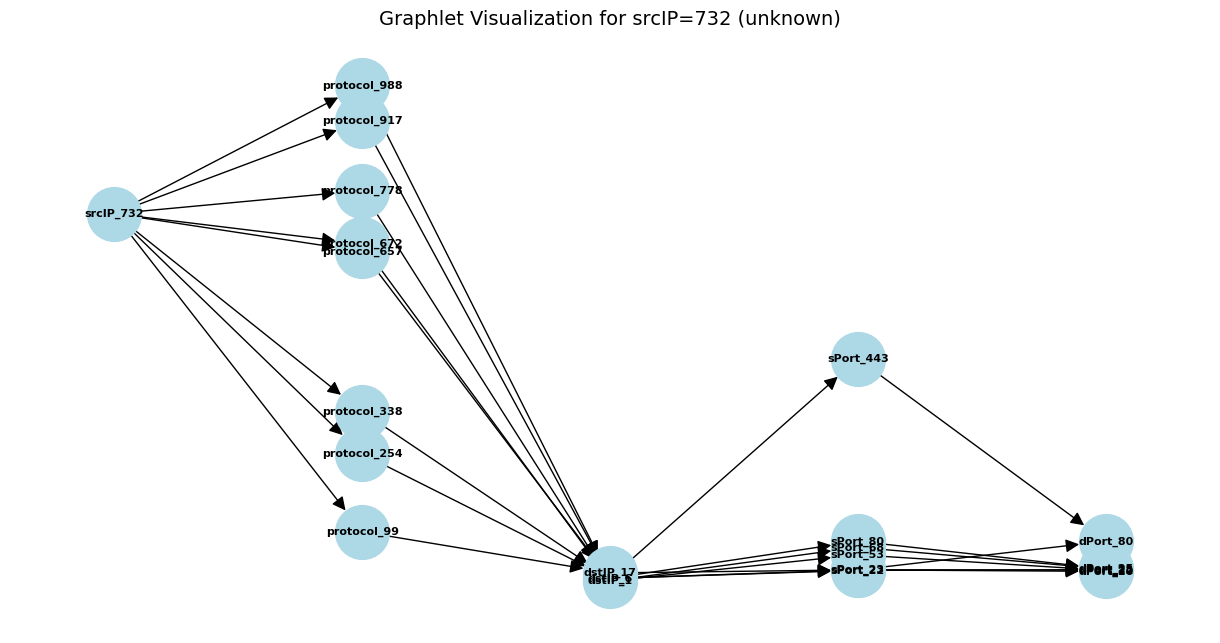

In [50]:
graphs_by_srcIP_not_labeled = {}
main('not-annotated-trace.csv', 732, has_label=False, graphs_by_srcIP=graphs_by_srcIP_not_labeled )

In [54]:
start=time.time()
kernel_file_path = "rwk_results_not_annoted.csv"  # Chemin vers le fichier contenant les RWK
if not os.path.exists(kernel_file_path):
    RWK_with_KT(4, graphs_by_srcIP_not_labeled)

kernel_matrix, unique_srcIPs = load_kernel_matrix(kernel_file_path)
X = kernel_matrix

print(f"X en mode test : {X.shape}")  # Doit √™tre (n', n) en mode precomputed


X en mode test : (1001, 1001)


In [60]:
# Ex√©cuter la pr√©diction
results = train_svm(X, kernel_type='precomputed', mode='test', model=svm_with_KT, train_indices=train_indices)

# Mesurer le temps d'ex√©cution
end = time.time()
print(f"Temps d'ex√©cution avec classification : {end - start:.2f} secondes")

# Afficher toutes les pr√©dictions
print("Pr√©dictions du mod√®le sur X_test :")
print(results)

# Compter le nombre de pr√©dictions √©gales √† 1
count = np.sum(results == 1)  # Utilisation de NumPy pour une meilleure performance
print(f"Nombre de pr√©dictions √©gales √† 1 : {count}")

# Afficher la longueur des r√©sultats
print(f"Nombre total de pr√©dictions : {len(results)}")


X en mode test apr√®s correction : (1001, 500)
Temps d'ex√©cution avec classification : 24.60 secondes
Pr√©dictions du mod√®le sur X_test :
[1 1 1 ... 1 1 1]
Nombre de pr√©dictions √©gales √† 1 : 981
Nombre total de pr√©dictions : 1001
